In [1]:
import pandas as pd
import numpy as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from nltk import FreqDist
from gensim import corpora
import pickle
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import distance

In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/positif.csv', delimiter=';')

df.head(10)

,text,sentiment
0,masyarakat mudah layan mata fasilitas sehat ti...,Positif
1,bpjs sehat ketenagakerjaan manfaat bagus,Positif
2,alhamdulillah bpjs sehat bener bantu warga pan...,Positif
3,bpjs iur banding premi asuransi sehat poin plus,Positif
4,naik iur org hasil minim bpjs subsidi perintah,Positif
5,manfaat berkat jkn kis serta bpjs sehat lancar...,Positif
6,terimakasih bpjs karna tanggung obat kalau bpj...,Positif
7,jkn kis harisomawati salah serta bpjs sehat la...,Positif
8,salah fasilitas bpjs sehat jalan cuci darah gr...,Positif
9,harisomawari salah serta jkn kis lancar jalan ...,Positif


In [4]:
print('Shape : ',df.shape)
df.head()

Shape :  (714, 2)


,text,sentiment
0,masyarakat mudah layan mata fasilitas sehat ti...,Positif
1,bpjs sehat ketenagakerjaan manfaat bagus,Positif
2,alhamdulillah bpjs sehat bener bantu warga pan...,Positif
3,bpjs iur banding premi asuransi sehat poin plus,Positif
4,naik iur org hasil minim bpjs subsidi perintah,Positif


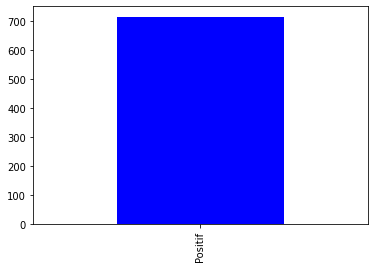

In [5]:
df['sentiment'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

In [6]:
df['sentiment'].value_counts()

Positif    714
Name: sentiment, dtype: int64

In [7]:
bow_transformer = CountVectorizer()
print(df['text'].shape)
X=bow_transformer.fit_transform(df['text'])

print (X.toarray())
print('Shape of Sparse Matrix : ',X.shape)
print('Amount of Non-zero accourences: ',X.nnz)

#save the count vectorized to disk
filename1 = 'count_vectorized.pkl'
pickle.dump(bow_transformer, open(filename1, 'wb'))

#TFID Transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

#save the TFID to disk
filename1 ='tfid_transform1.pkl'
pickle.dump(tf_transform, open(filename1, 'wb'))

(714,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix :  (714, 1635)
Amount of Non-zero accourences:  8879
(714, 1635)


In [8]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

bpjs          886
sehat         788
iur           282
layan         206
serta         184
bantu         142
naik          136
masyarakat    127
perintah      123
royong        111
dtype: int64

In [9]:
tf1 = (df['text'][:]).apply(lambda x: pd.value_counts(x.split('text'))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,masyarakat mudah layan mata fasilitas sehat ti...,1.0
1,bpjs sehat ketenagakerjaan manfaat bagus,1.0
2,alhamdulillah bpjs sehat bener bantu warga pan...,1.0
3,bpjs iur banding premi asuransi sehat poin plus,1.0
4,naik iur org hasil minim bpjs subsidi perintah,1.0
...,...,...
680,naik iur bpjs tuju jaga kualitas sinambung pro...,1.0
681,serta bpjs sehat kelas iii subsidi perintah,2.0
682,negara hadir sesuai iur bpjs sehat yuk simak j...,1.0
683,covid tunggak iur bayar max tunggak pres sesua...,1.0


In [10]:
import numpy as np
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['text'].str.contains(word)])))

tf1

,words,tf,idf
0,masyarakat mudah layan mata fasilitas sehat ti...,1.0,6.570883
1,bpjs sehat ketenagakerjaan manfaat bagus,1.0,6.570883
2,alhamdulillah bpjs sehat bener bantu warga pan...,1.0,6.570883
3,bpjs iur banding premi asuransi sehat poin plus,1.0,6.570883
4,naik iur org hasil minim bpjs subsidi perintah,1.0,6.570883
...,...,...,...
680,naik iur bpjs tuju jaga kualitas sinambung pro...,1.0,6.570883
681,serta bpjs sehat kelas iii subsidi perintah,2.0,5.877736
682,negara hadir sesuai iur bpjs sehat yuk simak j...,1.0,6.570883
683,covid tunggak iur bayar max tunggak pres sesua...,1.0,6.570883


In [11]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1


,words,tf,idf,tfidf
0,masyarakat mudah layan mata fasilitas sehat ti...,1.0,6.570883,6.570883
1,bpjs sehat ketenagakerjaan manfaat bagus,1.0,6.570883,6.570883
2,alhamdulillah bpjs sehat bener bantu warga pan...,1.0,6.570883,6.570883
3,bpjs iur banding premi asuransi sehat poin plus,1.0,6.570883,6.570883
4,naik iur org hasil minim bpjs subsidi perintah,1.0,6.570883,6.570883
...,...,...,...,...
680,naik iur bpjs tuju jaga kualitas sinambung pro...,1.0,6.570883,6.570883
681,serta bpjs sehat kelas iii subsidi perintah,2.0,5.877736,11.755472
682,negara hadir sesuai iur bpjs sehat yuk simak j...,1.0,6.570883,6.570883
683,covid tunggak iur bayar max tunggak pres sesua...,1.0,6.570883,6.570883


In [12]:
from sklearn.metrics import silhouette_score
from plotnine import *
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
features = ['tf' , 'idf' ]
X= tf1[features]
hac = AgglomerativeClustering(n_clusters= 8,
                              affinity ="euclidean",
                              linkage= "average")

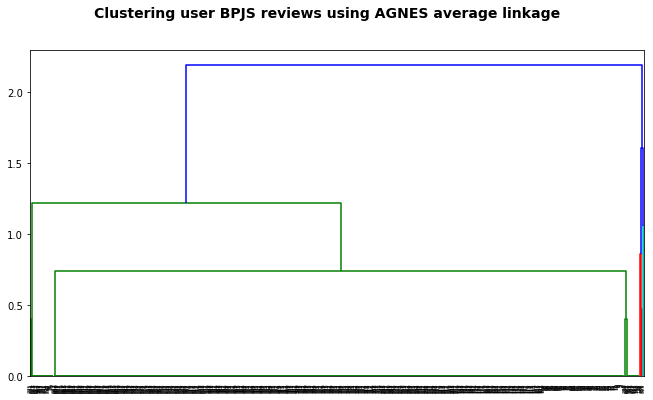

In [14]:
import scipy.cluster.hierarchy as sch
hac.fit(X)
fig = plt.figure(figsize=(11, 6))
plt.suptitle("Clustering user BPJS reviews using AGNES average linkage",
             fontsize=14, fontweight='bold')
dendro = sch.dendrogram(sch.linkage(X,method="average",metric= "euclidean"))

In [15]:
tweet = hac.labels_
tweet

array([2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
silhouette_score(X,tweet)

0.9876418352750388

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


<Figure size 432x288 with 0 Axes>

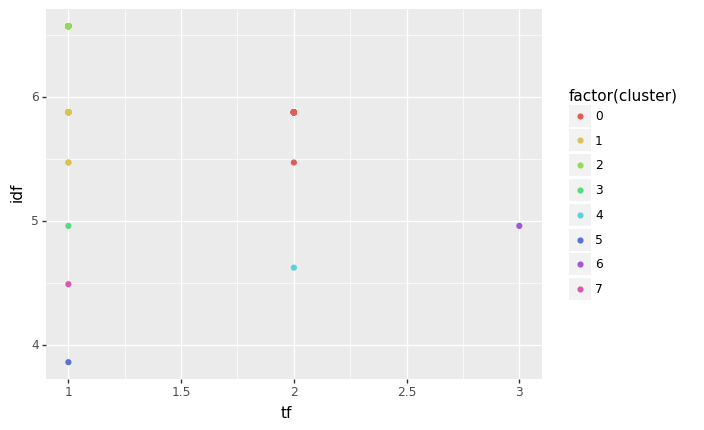

<ggplot: (8736731948961)>

In [18]:
tf1["cluster"]=tweet
plt.suptitle("Clustering user BPJS reviews using AGNES average linkage",
             fontsize=14, fontweight='bold')
(ggplot(tf1,aes(x="tf", y="idf", color= "factor(cluster)"))+geom_point())


In [19]:
# menghapus tf
tf1.drop('tf', axis=1, inplace=True)
tf1.isnull().sum().sort_values(ascending=False).head()

tweet=tf1
tf1


,words,idf,tfidf,cluster
0,masyarakat mudah layan mata fasilitas sehat ti...,6.570883,6.570883,2
1,bpjs sehat ketenagakerjaan manfaat bagus,6.570883,6.570883,2
2,alhamdulillah bpjs sehat bener bantu warga pan...,6.570883,6.570883,2
3,bpjs iur banding premi asuransi sehat poin plus,6.570883,6.570883,2
4,naik iur org hasil minim bpjs subsidi perintah,6.570883,6.570883,2
...,...,...,...,...
680,naik iur bpjs tuju jaga kualitas sinambung pro...,6.570883,6.570883,2
681,serta bpjs sehat kelas iii subsidi perintah,5.877736,11.755472,0
682,negara hadir sesuai iur bpjs sehat yuk simak j...,6.570883,6.570883,2
683,covid tunggak iur bayar max tunggak pres sesua...,6.570883,6.570883,2


In [20]:
# menghapus idf
tf1.drop('idf', axis=1, inplace=True)
tf1.isnull().sum().sort_values(ascending=False).head()

tweet=tf1
tf1

,words,tfidf,cluster
0,masyarakat mudah layan mata fasilitas sehat ti...,6.570883,2
1,bpjs sehat ketenagakerjaan manfaat bagus,6.570883,2
2,alhamdulillah bpjs sehat bener bantu warga pan...,6.570883,2
3,bpjs iur banding premi asuransi sehat poin plus,6.570883,2
4,naik iur org hasil minim bpjs subsidi perintah,6.570883,2
...,...,...,...
680,naik iur bpjs tuju jaga kualitas sinambung pro...,6.570883,2
681,serta bpjs sehat kelas iii subsidi perintah,11.755472,0
682,negara hadir sesuai iur bpjs sehat yuk simak j...,6.570883,2
683,covid tunggak iur bayar max tunggak pres sesua...,6.570883,2


In [21]:
# menghapus tfidf
tf1.drop('tfidf', axis=1, inplace=True)
tf1.isnull().sum().sort_values(ascending=False).head()

tweet=tf1
tf1

,words,cluster
0,masyarakat mudah layan mata fasilitas sehat ti...,2
1,bpjs sehat ketenagakerjaan manfaat bagus,2
2,alhamdulillah bpjs sehat bener bantu warga pan...,2
3,bpjs iur banding premi asuransi sehat poin plus,2
4,naik iur org hasil minim bpjs subsidi perintah,2
...,...,...
680,naik iur bpjs tuju jaga kualitas sinambung pro...,2
681,serta bpjs sehat kelas iii subsidi perintah,0
682,negara hadir sesuai iur bpjs sehat yuk simak j...,2
683,covid tunggak iur bayar max tunggak pres sesua...,2


In [22]:
#OUTPUT
clusters = tf1.groupby('cluster')
for cluster in clusters.groups :
  f = open('cluster'+ str(cluster)+'.csv','w')
  data= clusters.get_group(cluster)['words']
  f.write(data.to_csv(index_label='id'))
  f.close()

In [23]:
#print("clustercentroids: \n")
#order_centroids = X.argsort()[:, ::1]
#term = vectorizer.get_featur_names()
#for i in range(n_clusters):
 # print("cluster %d: " %i)
  #for j in order_centroids[i, :10]:
   # print('%s' %term[j])


In [24]:
#tf1.to_csv(r'/content/drive/My Drive/Colab Notebooks/Hasil/Negatif/10/Hasil.csv',columns=["words","cluster"])